# CS 20: TensorFlow for Deep Learning - Lecture3

### Linear Regresssion Model
Solution for simple linear regression example using tf.data

Created by Chip Huyen (chiphuyen@cs.stanford.edu)

CS20: "TensorFlow for Deep Learning Research"

cs20.stanford.edu Lecture 03


In [34]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

In [35]:
DATA_FILE = 'data/fire_theft.xls'

In [36]:
# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

In [37]:
print(data)
print(n_samples)

[[  6.2  29. ]
 [  9.5  44. ]
 [ 10.5  36. ]
 [  7.7  37. ]
 [  8.6  53. ]
 [ 34.1  68. ]
 [ 11.   75. ]
 [  6.9  18. ]
 [  7.3  31. ]
 [ 15.1  25. ]
 [ 29.1  34. ]
 [  2.2  14. ]
 [  5.7  11. ]
 [  2.   11. ]
 [  2.5  22. ]
 [  4.   16. ]
 [  5.4  27. ]
 [  2.2   9. ]
 [  7.2  29. ]
 [ 15.1  30. ]
 [ 16.5  40. ]
 [ 18.4  32. ]
 [ 36.2  41. ]
 [ 39.7 147. ]
 [ 18.5  22. ]
 [ 23.3  29. ]
 [ 12.2  46. ]
 [  5.6  23. ]
 [ 21.8   4. ]
 [ 21.6  31. ]
 [  9.   39. ]
 [  3.6  15. ]
 [  5.   32. ]
 [ 28.6  27. ]
 [ 17.4  32. ]
 [ 11.3  34. ]
 [  3.4  17. ]
 [ 11.9  46. ]
 [ 10.5  42. ]
 [ 10.7  43. ]
 [ 10.8  34. ]
 [  4.8  19. ]]
42


In [38]:
# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

In [39]:
# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

In [40]:
# Step 4: build model to predict Y
Y_predicted = X * w + b 

In [41]:
# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')

In [42]:
# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [43]:
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
    
    # Step 8: train the model
    for i in range(50):
        total_loss = 0
        for x, y in data:
            # Session runs train_op and fetch values of loss
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y: y})
            total_loss += l
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
        
    writer.close()
        
    # Step 9: output the values of w and b
    w_value, b_value = sess.run([w, b])

Epoch 0: 2069.6319333978354
Epoch 1: 2117.0123581953535
Epoch 2: 2092.302723001866
Epoch 3: 2068.5080461938464
Epoch 4: 2045.591184088162
Epoch 5: 2023.5146448101316
Epoch 6: 2002.2447619835536
Epoch 7: 1981.748338803649
Epoch 8: 1961.9944411260742
Epoch 9: 1942.9520116143283
Epoch 10: 1924.5930823644712
Epoch 11: 1906.8898800636332
Epoch 12: 1889.8164505837929
Epoch 13: 1873.347133841543
Epoch 14: 1857.4588400604468
Epoch 15: 1842.1278742424079
Epoch 16: 1827.332495119955
Epoch 17: 1813.0520579712022
Epoch 18: 1799.2660847636982
Epoch 19: 1785.9562132299961
Epoch 20: 1773.1024853109072
Epoch 21: 1760.689129482884
Epoch 22: 1748.6984157081515
Epoch 23: 1737.1138680398553
Epoch 24: 1725.920873066732
Epoch 25: 1715.1046249579008
Epoch 26: 1704.6500954309377
Epoch 27: 1694.5447134910141
Epoch 28: 1684.7746311347667
Epoch 29: 1675.328450968245
Epoch 30: 1666.1935385839038
Epoch 31: 1657.3584002084322
Epoch 32: 1648.8122658529207
Epoch 33: 1640.5440742547091
Epoch 34: 1632.5446836102221
Epo

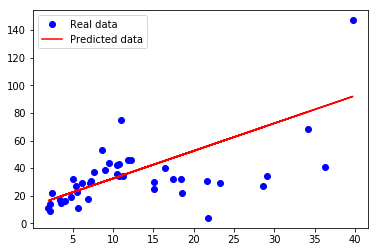

In [44]:
# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w_value + b_value, 'r', label='Predicted data')
plt.legend()
plt.show()

## Optimizers
tf.train.GradientDescentOptimizer

tf.train.AdagradOptimizer

tf.train.MomentumOptimizer

tf.train.AdamOptimizer

tf.train.FtrlOptimizer

tf.train.RMSPropOptimizer

...

## Huber Loss
Robust to outliers

Intuition: if the difference between the predicted value and the real value is small, square it. If it is large, take its absolute value.

In [45]:
def huber_loss(labels, predictions, delta=1.0):
    residual = tf.abs(predictions - labels)
    condition = tf.less(residual, delta)
    small_res = 0.5 * tf.square(residual)
    large_res = delta * residual - 0.5 * tf.square(delta)
    return tf.select(condition, small_res, large_res)

# Logistic Regression

In [58]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import time

In [59]:
# Define paramaters for the model
learning_rate = 0.01
batch_size = 128
n_epochs = 30

In [73]:
# Step 1: Read in data
# using TF Learn's built in function to load MNIST data to the folder data/mnist
mnist = input_data.read_data_sets('/data/mnist', one_hot=True) 

PermissionDeniedError: /data; Permission denied

In [61]:
# Step 2: create placeholders for features and labels
# each image in the MNIST data is of shape 28*28 = 784
# therefore, each image is represented with a 1x784 tensor
# there are 10 classes for each image, corresponding to digits 0 - 9. 
# each lable is one hot vector.
X = tf.placeholder(tf.float32, [batch_size, 784], name='X_placeholder') 
Y = tf.placeholder(tf.int32, [batch_size, 10], name='Y_placeholder')

In [62]:
# Step 3: create weights and bias
# w is initialized to random variables with mean of 0, stddev of 0.01
# b is initialized to 0
# shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w)
# shape of b depends on Y
w = tf.Variable(tf.random_normal(shape=[784, 10], stddev=0.01), name='weights')
b = tf.Variable(tf.zeros([1, 10]), name="bias")

In [63]:
# Step 4: build model
# the model that returns the logits.
# this logits will be later passed through softmax layer
logits = tf.matmul(X, w) + b 

In [64]:
# Step 5: define loss function
# use cross entropy of softmax of logits as the loss function
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y, name='loss')
loss = tf.reduce_mean(entropy) # computes the mean over all the examples in the batch

In [65]:
# Step 6: define training op
# using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [72]:
with tf.Session() as sess:
    # to visualize using TensorBoard
    writer = tf.summary.FileWriter('./graphs/logistic_reg', sess.graph)

    start_time = time.time()
    sess.run(tf.global_variables_initializer())
    n_batches = int(mnist.train.num_examples/batch_size)
    for i in range(n_epochs): # train the model n_epochs times
        total_loss = 0

        for _ in range(n_batches):
            X_batch, Y_batch = mnist.train.next_batch(batch_size)
            print(Y_batch)
            print(Y_batch.shape)            
            break
            _, loss_batch = sess.run([optimizer, loss], feed_dict={X: X_batch, Y:Y_batch}) 
            total_loss += loss_batch
        print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))
        break
    print('Total time: {0} seconds'.format(time.time() - start_time))

    print('Optimization Finished!') # should be around 0.35 after 25 epochs

    # test the model
    preds = tf.nn.softmax(logits)
    correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32)) # need numpy.count_nonzero(boolarr) :(
    
    n_batches = int(mnist.test.num_examples/batch_size)
    total_correct_preds = 0
        
    for i in range(n_batches):
        X_batch, Y_batch = mnist.test.next_batch(batch_size)
        accuracy_batch = sess.run([accuracy], feed_dict={X: X_batch, Y:Y_batch}) 
        total_correct_preds += accuracy_batch 

    print('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))

    writer.close()

[8 5 7 7 4 6 2 8 1 5 9 4 7 1 6 2 0 7 8 3 0 3 6 4 3 1 1 9 4 7 0 1 4 0 2 5 8
 0 1 6 1 7 5 8 0 0 3 3 1 0 6 2 6 1 1 3 7 7 7 2 5 2 3 7 8 4 6 6 5 4 1 0 6 1
 1 7 1 1 6 2 9 9 1 5 9 4 0 7 3 1 4 0 1 6 0 9 2 9 1 9 1 8 8 8 2 8 3 2 2 5 6
 0 9 9 4 2 8 5 2 4 9 6 9 3 2 1 4 2]
(128,)
Average loss epoch 0: 0.0
Total time: 0.02180004119873047 seconds
Optimization Finished!


ValueError: Cannot feed value of shape (128,) for Tensor 'Y_placeholder_1:0', which has shape '(128, 10)'